##Problem Statement:
In today's era, credit scoring is not only used in financial scenes such as handling credit cards and loans, but similar scoring products have touched all aspects of our lives, such as deposit free by charging treasure, payment after taxi use, and even in recruitment, marriage scenes.

As the pioneer of financial technology, the bank has hundreds of millions of APP users every month. App services not only cover financial scenarios such as capital transaction, financial management and credit, but also extend to non-financial scenarios such as meal ticket, shadow ticket, travel and information. It can build users' credit score and provide users with better and convenient services based on credit score.We hope to build a credit fraudalent prediction model based on the data set.

Link to dataset: https://www.kaggle.com/datasets/hwwang98/fintechdataset?select=train_tag.csv

In [1]:
#importing basic libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=50


In [2]:
#importing the dataset:
train_df = pd.read_csv('train_tag.csv')

In [3]:
train_df.shape

(39923, 43)

In [4]:
#working with the train_df:
#checking the train_df
train_df.sample(5)

,id,flag,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,fr_or_sh_ind,dnl_mbl_bnk_ind,dnl_bind_cmb_lif_ind,hav_car_grp_ind,hav_hou_grp_ind,l6mon_agn_ind,frs_agn_dt_cnt,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,l12mon_buy_fin_mng_whl_tms,l12_mon_fnd_buy_whl_tms,l12_mon_insu_buy_whl_tms,l12_mon_gld_buy_whl_tms,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,atdd_type,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
33387,U998BF2,0,F,27,A,F,G,NaN,0,0,0,0,1,0,0,0,-1,0,-1,-1,1,0,-1,6,0,0,0,0,0,0,0,0,0,20,1,4,0,6,1,2,2079,2078,10
31935,U108AE2,0,M,34,B,F,G,NaN,0,0,1,1,1,1,0,0,765,0,-1,-1,1,2,-1,3,0,0,0,0,0,0,0,0,0,20,1,5,NaN,5,1,4,1888,1775,10
11321,U46800B,0,F,20,A,NaN,F,NaN,0,0,0,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,10,1,3,NaN,1,0,1,-1,265,0
35075,U2BC1AC,0,F,28,A,B,30,NaN,2,0,0,1,1,0,0,0,-1,0,-1,-1,1,1,-1,5,0,0,0,0,0,0,0,0,0,10,1,4,0,4,1,1,1126,1125,10
20355,U1D02CB,0,M,45,B,F,G,~,0,0,0,1,0,0,0,0,388,1,1,1,1,1,-1,5,0,0,0,0,0,0,0,0,0,20,0,0,NaN,3,1,2,408,192,10


In [5]:
#checking the info:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39923 entries, 0 to 39922
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   id                               39923 non-null  object
 1   flag                             39923 non-null  int64 
 2   gdr_cd                           39923 non-null  object
 3   age                              39923 non-null  int64 
 4   mrg_situ_cd                      39923 non-null  object
 5   edu_deg_cd                       27487 non-null  object
 6   acdm_deg_cd                      39922 non-null  object
 7   deg_cd                           18960 non-null  object
 8   job_year                         39923 non-null  object
 9   ic_ind                           39923 non-null  object
 10  fr_or_sh_ind                     39923 non-null  object
 11  dnl_mbl_bnk_ind                  39923 non-null  object
 12  dnl_bind_cmb_lif_ind            

In [6]:
#checking for duplicates:
train_df.duplicated().sum()

0

In [7]:
#checking for % of null values:
(train_df.isnull().sum()/train_df.shape[0])*100

id                                  0.000000
flag                                0.000000
gdr_cd                              0.000000
age                                 0.000000
mrg_situ_cd                         0.000000
edu_deg_cd                         31.149964
acdm_deg_cd                         0.002505
deg_cd                             52.508579
job_year                            0.000000
ic_ind                              0.000000
fr_or_sh_ind                        0.000000
dnl_mbl_bnk_ind                     0.000000
dnl_bind_cmb_lif_ind                0.000000
hav_car_grp_ind                     0.000000
hav_hou_grp_ind                     0.000000
l6mon_agn_ind                       0.000000
frs_agn_dt_cnt                      0.000000
vld_rsk_ases_ind                    0.000000
fin_rsk_ases_grd_cd                 0.000000
confirm_rsk_ases_lvl_typ_cd         0.000000
cust_inv_rsk_endu_lvl_cd            0.000000
l6mon_daim_aum_cd                   0.000000
tot_ast_lv

- There is more than 30% of missing data in the columns: edu_deg_cd, deg_cd and atdd_type, so lets analyse the columns and check if we should keep or drop the columns.

In [8]:
#checking the stats of training data:
train_df.describe(percentiles=[0.1,0.25,0.50,0.75,0.9,0.95,0.99])

,flag,age,l6mon_daim_aum_cd,bk1_cur_year_mon_avg_agn_amt_cd,pl_crd_lmt_cd,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
count,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000
mean,0.224257,34.325727,0.875235,0.403652,0.187060,3.690179,1.109110,1.440924,1221.380608,1293.431305,8.700999
std,0.417097,8.541069,1.354406,1.293567,0.963996,2.124529,2.521372,1.497116,1604.667054,1270.756497,7.894769
min,0.000000,19.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
10%,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,88.000000,0.000000
25%,0.000000,28.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,-1.000000,360.000000,0.000000
50%,0.000000,33.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,493.000000,861.000000,10.000000
75%,0.000000,39.000000,1.000000,0.000000,0.000000,5.000000,1.000000,2.000000,1851.000000,1810.000000,10.000000
90%,1.000000,47.000000,3.000000,2.000000,0.000000,7.000000,2.000000,2.000000,3623.000000,3317.000000,20.000000
95%,1.000000,51.000000,4.000000,4.000000,0.000000,7.000000,3.000000,3.000000,4768.000000,4230.000000,20.000000


- Observations:
 - Target column flag is imbalanced.
 - 'age' seems to have normal distribution.
 - Majority of values in columns 'bk1_cur_year_mon_avg_agn_amt_cd' and	'pl_crd_lmt_cd' are 0.
 - Normalization is required to scale down the dataset as we have few columns with extremely low/high values.

In [9]:
train_df['gdr_cd'].value_counts()

M     23015
F     16172
\N      736
Name: gdr_cd, dtype: int64

In [10]:
train_df['mrg_situ_cd'].value_counts()

A     19119
B     18598
O      1035
\N      736
~       248
Z       187
Name: mrg_situ_cd, dtype: int64

In [11]:
train_df[train_df['gdr_cd']=='\\N']

,id,flag,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,fr_or_sh_ind,dnl_mbl_bnk_ind,dnl_bind_cmb_lif_ind,hav_car_grp_ind,hav_hou_grp_ind,l6mon_agn_ind,frs_agn_dt_cnt,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,l12mon_buy_fin_mng_whl_tms,l12_mon_fnd_buy_whl_tms,l12_mon_insu_buy_whl_tms,l12_mon_gld_buy_whl_tms,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,atdd_type,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
2404,UA040CF,1,\N,28,\N,\N,\N,\N,0,0,0,0,1,0,0,0,-1,0,-1,-1,1,0,1,-1,0,0,0,0,0,0,0,0,0,20,1,3,NaN,2,0,1,-1,756,0
2411,U1D6FB6,1,\N,24,\N,\N,\N,\N,0,0,0,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,10,0,2,NaN,3,0,1,-1,530,0
2448,UFE2CCB,1,\N,30,\N,\N,\N,\N,3,0,0,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,1,1,NaN,1,0,2,-1,110,0
2478,UEFDA29,0,\N,23,\N,\N,\N,\N,0,0,0,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,1,3,NaN,1,0,6,-1,210,0
2558,U804AD4,0,\N,57,\N,\N,\N,\N,1,0,0,0,1,1,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,10,1,4,NaN,2,0,1,-1,514,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39869,U28D511,0,\N,24,\N,\N,\N,\N,0,0,0,1,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,1,1,NaN,1,0,4,-1,153,0
39882,UEBC584,0,\N,31,\N,\N,\N,\N,5,0,0,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,1,4,NaN,4,0,1,-1,158,0
39902,U4056F1,0,\N,28,\N,\N,\N,\N,1,0,0,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,1,3,NaN,3,0,1,-1,163,0
39905,U254312,0,\N,21,\N,\N,\N,\N,0,0,0,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,1,0,NaN,1,0,1,-1,163,0


- As we can see above, we have 736 rows with '\N' value in many columns, this seems that the value is 'unknown' and we will drop the rows.

In [12]:
train_df = train_df[~(train_df['gdr_cd']=='\\N')]
train_df

,id,flag,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,fr_or_sh_ind,dnl_mbl_bnk_ind,dnl_bind_cmb_lif_ind,hav_car_grp_ind,hav_hou_grp_ind,l6mon_agn_ind,frs_agn_dt_cnt,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,l12mon_buy_fin_mng_whl_tms,l12_mon_fnd_buy_whl_tms,l12_mon_insu_buy_whl_tms,l12_mon_gld_buy_whl_tms,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,atdd_type,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
0,U7A4BAD,0,M,41,B,B,Z,NaN,3,0,0,0,1,0,0,0,-1,0,-1,4,1,0,-1,6,0,0,0,0,0,0,0,0,0,-1,0,0,0,3,1,0,3492,-1,10
1,U557810,0,M,35,A,NaN,G,NaN,4,0,0,0,0,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,-1,0,0,0,1,1,0,4575,-1,10
2,U1E9240,0,M,53,B,A,C,C,9,0,0,1,1,0,0,1,935,1,3,3,6,7,-1,2,8,6,0,0,0,0,0,0,0,-1,0,0,0,7,2,0,4894,-1,40
3,U6DED00,0,F,41,B,NaN,Z,NaN,0,0,0,0,0,0,0,0,-1,0,-1,-1,1,0,-1,6,0,0,0,0,0,0,0,0,0,-1,0,0,0,1,1,0,4938,-1,10
4,UDA8E28,0,F,42,B,B,Z,B,3,1,1,1,0,0,1,0,-1,0,-1,-1,1,5,-1,3,0,0,0,0,0,1,6,0,4,-1,0,0,0,2,7,0,2378,-1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39918,U8E66E5,1,M,24,A,NaN,G,NaN,1,0,1,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,1,1,NaN,1,0,1,-1,165,0
39919,U70BACF,0,M,41,B,NaN,G,NaN,1,0,0,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,1,0,NaN,1,0,2,-1,166,0
39920,U777E7D,0,M,29,A,NaN,G,NaN,0,0,0,0,0,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,0,0,NaN,3,0,1,-1,166,0
39921,UE77AAD,0,M,31,A,NaN,31,NaN,0,0,0,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,0,0,NaN,3,0,1,-1,166,0


In [13]:
train_df['edu_deg_cd'].isnull().sum()

12436

In [14]:
train_df['edu_deg_cd'].value_counts()

F    6917
C    6695
B    6672
K    2312
Z    2097
G     953
A     889
~     108
M      54
L      33
D      20
J       1
Name: edu_deg_cd, dtype: int64

- We can randomly impute the missing data in the edu_deg_cd column with the given classes, and check at the time of feature selection whether the column is required or not.
- We will replace '~' class label to 'O' which will stand for 'others' and then perform random imputation on the column.

In [15]:
#replacing '~' class label to 'O' which will stand for 'others'
train_df['edu_deg_cd'] = train_df['edu_deg_cd'].str.replace("~",'O')
train_df['edu_deg_cd'].value_counts()

F    6917
C    6695
B    6672
K    2312
Z    2097
G     953
A     889
O     108
M      54
L      33
D      20
J       1
Name: edu_deg_cd, dtype: int64

In [16]:
#imputing random values inplace of missing values:
classes_list = ['A', 'L', 'K', 'G', 'Z', 'O', 'D', 'M', 'J'] #excluding B,C,F as we already have more number of values of these classes.
train_df['edu_deg_cd'] = train_df['edu_deg_cd'].apply(lambda x: random.choice(classes_list) if str(x) == 'nan' else x)
train_df['edu_deg_cd']

0        B
1        Z
2        A
3        M
4        B
        ..
39918    L
39919    J
39920    Z
39921    Z
39922    D
Name: edu_deg_cd, Length: 39187, dtype: object

In [17]:
train_df['edu_deg_cd'].value_counts()

F    6917
C    6695
B    6672
K    3698
Z    3463
G    2363
A    2217
O    1521
L    1452
M    1411
D    1390
J    1388
Name: edu_deg_cd, dtype: int64

In [18]:
#lets check deg_cd col:
train_df['deg_cd'].value_counts()

~    17050
A      543
B      332
Z      171
C      118
D       10
Name: deg_cd, dtype: int64

- The values in this column doesnt give a proper explanation of the classes and also more than 50% of the valuesa are missing in the column so we will drop this column.

In [19]:
#lets check atdd_type col:
train_df['atdd_type'].value_counts()

0     15113
1      1095
\N        7
Name: atdd_type, dtype: int64

- As we can see atdd_type column is a categorical column with values 0 and 1, where majority of values are 0 and thus it is an imbalanced column, also more than 50% of values are missing so we will drop this column as well.

In [20]:
#dropping the cols:
train_df = train_df.drop(columns=['deg_cd','atdd_type'])

In [21]:
train_df.isnull().sum()

id                                 0
flag                               0
gdr_cd                             0
age                                0
mrg_situ_cd                        0
edu_deg_cd                         0
acdm_deg_cd                        1
job_year                           0
ic_ind                             0
fr_or_sh_ind                       0
dnl_mbl_bnk_ind                    0
dnl_bind_cmb_lif_ind               0
hav_car_grp_ind                    0
hav_hou_grp_ind                    0
l6mon_agn_ind                      0
frs_agn_dt_cnt                     0
vld_rsk_ases_ind                   0
fin_rsk_ases_grd_cd                0
confirm_rsk_ases_lvl_typ_cd        0
cust_inv_rsk_endu_lvl_cd           0
l6mon_daim_aum_cd                  0
tot_ast_lvl_cd                     0
pot_ast_lvl_cd                     0
bk1_cur_year_mon_avg_agn_amt_cd    0
l12mon_buy_fin_mng_whl_tms         0
l12_mon_fnd_buy_whl_tms            0
l12_mon_insu_buy_whl_tms           0
l

In [22]:
#dropping the null value:
train_df.dropna(inplace=True)

In [23]:
#lets check categorical columns:
cat_cols = train_df.select_dtypes(exclude='number').columns.to_list()
cat_cols

['id',
 'gdr_cd',
 'mrg_situ_cd',
 'edu_deg_cd',
 'acdm_deg_cd',
 'job_year',
 'ic_ind',
 'fr_or_sh_ind',
 'dnl_mbl_bnk_ind',
 'dnl_bind_cmb_lif_ind',
 'hav_car_grp_ind',
 'hav_hou_grp_ind',
 'l6mon_agn_ind',
 'frs_agn_dt_cnt',
 'vld_rsk_ases_ind',
 'fin_rsk_ases_grd_cd',
 'confirm_rsk_ases_lvl_typ_cd',
 'cust_inv_rsk_endu_lvl_cd',
 'tot_ast_lvl_cd',
 'pot_ast_lvl_cd',
 'l12mon_buy_fin_mng_whl_tms',
 'l12_mon_fnd_buy_whl_tms',
 'l12_mon_insu_buy_whl_tms',
 'l12_mon_gld_buy_whl_tms',
 'loan_act_ind',
 'ovd_30d_loan_tot_cnt',
 'his_lng_ovd_day',
 'hld_crd_card_grd_cd',
 'crd_card_act_ind',
 'l1y_crd_card_csm_amt_dlm_cd']

In [24]:
len(cat_cols)

30

In [25]:
#gdr_cd
train_df[cat_cols[1]].value_counts()

M    23014
F    16172
Name: gdr_cd, dtype: int64

In [26]:
# mrg_situ_cd
train_df[cat_cols[2]].value_counts()

A    19119
B    18597
O     1035
~      248
Z      187
Name: mrg_situ_cd, dtype: int64

In [27]:
#repalcing '~' with 'C' for 'others':
train_df['mrg_situ_cd'] = train_df['mrg_situ_cd'].str.replace('~','C')
train_df['mrg_situ_cd'].value_counts()

A    19119
B    18597
O     1035
C      248
Z      187
Name: mrg_situ_cd, dtype: int64

In [28]:
#edu_deg_cd
train_df[cat_cols[3]].value_counts()

F    6917
C    6694
B    6672
K    3698
Z    3463
G    2363
A    2217
O    1521
L    1452
M    1411
D    1390
J    1388
Name: edu_deg_cd, dtype: int64

In [29]:
#acdm_deg_cd
train_df[cat_cols[4]].value_counts()

G     13267
31    10419
30     8229
Z      4469
F      1635
C      1064
D       103
Name: acdm_deg_cd, dtype: int64

In [30]:
# assigning an alphabet to 31 and 30 with A and B:
train_df['acdm_deg_cd'] = train_df['acdm_deg_cd'].str.replace('31','A')
train_df['acdm_deg_cd'] = train_df['acdm_deg_cd'].str.replace('30','B')
train_df['acdm_deg_cd'].value_counts()

G    13267
A    10419
B     8229
Z     4469
F     1635
C     1064
D      103
Name: acdm_deg_cd, dtype: int64

In [31]:
# job_year
train_df[cat_cols[5]].value_counts()

0     16934
1      6129
2      4039
3      2750
5      1545
4      1472
6       875
10      800
8       634
7       595
\N      465
15      332
9       310
12      272
20      252
14      217
13      213
16      198
11      197
17      142
18      113
30       96
25       87
22       58
19       50
21       48
28       47
24       42
23       41
26       40
27       34
32       24
35       23
29       20
31       19
33       17
37       12
34       11
36       10
38        7
40        6
39        4
41        2
43        2
99        1
42        1
Name: job_year, dtype: int64

In [32]:
train_df[train_df['job_year'] == '\\N']

,id,flag,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,job_year,ic_ind,fr_or_sh_ind,dnl_mbl_bnk_ind,dnl_bind_cmb_lif_ind,hav_car_grp_ind,hav_hou_grp_ind,l6mon_agn_ind,frs_agn_dt_cnt,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,l12mon_buy_fin_mng_whl_tms,l12_mon_fnd_buy_whl_tms,l12_mon_insu_buy_whl_tms,l12_mon_gld_buy_whl_tms,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
996,UC06E4C,0,F,41,A,C,A,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,-1,\N,\N,-1,\N,\N,\N,\N,\N,-1,\N,\N,\N,\N,\N,2,1,0,5849,-1,10
1155,U7990AD,0,M,45,B,B,B,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,-1,\N,\N,-1,\N,\N,\N,\N,\N,-1,\N,\N,\N,\N,\N,3,1,0,3220,-1,10
1396,U5C63FB,0,F,51,A,B,B,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,-1,\N,\N,-1,\N,\N,\N,\N,\N,-1,\N,\N,\N,\N,\N,2,1,0,6896,-1,10
1473,U91C69E,0,F,42,A,B,Z,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,-1,\N,\N,-1,\N,\N,\N,\N,\N,-1,\N,\N,\N,\N,\N,7,1,0,7252,-1,10
1657,UA5CD06,1,F,42,B,M,B,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,-1,\N,\N,-1,\N,\N,\N,\N,\N,-1,\N,\N,\N,\N,\N,1,1,0,6578,-1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39582,U20520E,0,F,20,O,G,Z,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,-1,\N,\N,-1,\N,\N,\N,\N,\N,-1,\N,\N,\N,\N,\N,0,0,1,-1,176,0
39607,UFA59D1,0,M,55,B,Z,B,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,-1,\N,\N,-1,\N,\N,\N,\N,\N,-1,\N,\N,\N,\N,\N,7,0,2,-1,67,0
39636,UF482C7,0,M,44,O,D,A,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,-1,\N,\N,-1,\N,\N,\N,\N,\N,-1,\N,\N,\N,\N,\N,2,0,1,-1,21,0
39735,U118EB6,0,M,30,A,A,C,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,-1,\N,\N,-1,\N,\N,\N,\N,\N,-1,\N,\N,\N,\N,\N,4,0,1,-1,91,0


- As we can see we have more '\N' values in many columns, lets drop them.

In [33]:
train_df = train_df[~(train_df['job_year'] == '\\N')]
train_df

,id,flag,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,job_year,ic_ind,fr_or_sh_ind,dnl_mbl_bnk_ind,dnl_bind_cmb_lif_ind,hav_car_grp_ind,hav_hou_grp_ind,l6mon_agn_ind,frs_agn_dt_cnt,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,l12mon_buy_fin_mng_whl_tms,l12_mon_fnd_buy_whl_tms,l12_mon_insu_buy_whl_tms,l12_mon_gld_buy_whl_tms,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
0,U7A4BAD,0,M,41,B,B,Z,3,0,0,0,1,0,0,0,-1,0,-1,4,1,0,-1,6,0,0,0,0,0,0,0,0,0,-1,0,0,3,1,0,3492,-1,10
1,U557810,0,M,35,A,Z,G,4,0,0,0,0,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,-1,0,0,1,1,0,4575,-1,10
2,U1E9240,0,M,53,B,A,C,9,0,0,1,1,0,0,1,935,1,3,3,6,7,-1,2,8,6,0,0,0,0,0,0,0,-1,0,0,7,2,0,4894,-1,40
3,U6DED00,0,F,41,B,M,Z,0,0,0,0,0,0,0,0,-1,0,-1,-1,1,0,-1,6,0,0,0,0,0,0,0,0,0,-1,0,0,1,1,0,4938,-1,10
4,UDA8E28,0,F,42,B,B,Z,3,1,1,1,0,0,1,0,-1,0,-1,-1,1,5,-1,3,0,0,0,0,0,1,6,0,4,-1,0,0,2,7,0,2378,-1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39918,U8E66E5,1,M,24,A,L,G,1,0,1,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,1,1,1,0,1,-1,165,0
39919,U70BACF,0,M,41,B,J,G,1,0,0,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,1,0,1,0,2,-1,166,0
39920,U777E7D,0,M,29,A,Z,G,0,0,0,0,0,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,0,0,3,0,1,-1,166,0
39921,UE77AAD,0,M,31,A,Z,A,0,0,0,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,0,0,3,0,1,-1,166,0


In [34]:
#converting dtype to int
train_df['job_year'] = train_df['job_year'].astype('int')
train_df['job_year']

0        3
1        4
2        9
3        0
4        3
        ..
39918    1
39919    1
39920    0
39921    0
39922    3
Name: job_year, Length: 38721, dtype: int64

In [35]:
train_df.sample(5)

,id,flag,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,job_year,ic_ind,fr_or_sh_ind,dnl_mbl_bnk_ind,dnl_bind_cmb_lif_ind,hav_car_grp_ind,hav_hou_grp_ind,l6mon_agn_ind,frs_agn_dt_cnt,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,l12mon_buy_fin_mng_whl_tms,l12_mon_fnd_buy_whl_tms,l12_mon_insu_buy_whl_tms,l12_mon_gld_buy_whl_tms,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
23970,UDBA003,0,F,31,A,F,G,2,0,0,1,1,1,0,0,677,0,-1,-1,1,2,3,5,0,0,0,0,0,0,0,0,0,10,1,3,2,1,1,4425,3317,10
7666,UEB1BE0,1,M,33,A,F,G,9,0,0,1,1,0,0,0,-1,0,-1,-1,1,1,-1,5,0,0,0,0,0,0,0,0,0,20,1,3,3,2,1,460,3044,10
6806,U9FD319,1,M,35,A,K,G,1,0,1,1,1,1,0,0,-1,1,3,3,1,0,2,6,0,0,0,0,0,0,0,0,0,20,1,4,5,1,2,418,969,10
21830,UA267B3,0,M,41,O,B,B,2,1,1,1,1,1,0,0,-1,1,4,4,4,5,2,3,0,1,0,0,0,1,5,0,0,20,1,4,8,3,2,6002,5416,10
18430,U79AC91,0,M,41,B,C,A,0,0,0,0,1,0,0,0,-1,0,-1,2,1,0,-1,6,0,0,0,0,0,0,0,0,0,20,1,3,1,1,1,843,843,10


In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38721 entries, 0 to 39922
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   id                               38721 non-null  object
 1   flag                             38721 non-null  int64 
 2   gdr_cd                           38721 non-null  object
 3   age                              38721 non-null  int64 
 4   mrg_situ_cd                      38721 non-null  object
 5   edu_deg_cd                       38721 non-null  object
 6   acdm_deg_cd                      38721 non-null  object
 7   job_year                         38721 non-null  int64 
 8   ic_ind                           38721 non-null  object
 9   fr_or_sh_ind                     38721 non-null  object
 10  dnl_mbl_bnk_ind                  38721 non-null  object
 11  dnl_bind_cmb_lif_ind             38721 non-null  object
 12  hav_car_grp_ind                 

In [37]:
train_df.columns

Index(['id', 'flag', 'gdr_cd', 'age', 'mrg_situ_cd', 'edu_deg_cd',
       'acdm_deg_cd', 'job_year', 'ic_ind', 'fr_or_sh_ind', 'dnl_mbl_bnk_ind',
       'dnl_bind_cmb_lif_ind', 'hav_car_grp_ind', 'hav_hou_grp_ind',
       'l6mon_agn_ind', 'frs_agn_dt_cnt', 'vld_rsk_ases_ind',
       'fin_rsk_ases_grd_cd', 'confirm_rsk_ases_lvl_typ_cd',
       'cust_inv_rsk_endu_lvl_cd', 'l6mon_daim_aum_cd', 'tot_ast_lvl_cd',
       'pot_ast_lvl_cd', 'bk1_cur_year_mon_avg_agn_amt_cd',
       'l12mon_buy_fin_mng_whl_tms', 'l12_mon_fnd_buy_whl_tms',
       'l12_mon_insu_buy_whl_tms', 'l12_mon_gld_buy_whl_tms', 'loan_act_ind',
       'pl_crd_lmt_cd', 'ovd_30d_loan_tot_cnt', 'his_lng_ovd_day',
       'hld_crd_card_grd_cd', 'crd_card_act_ind',
       'l1y_crd_card_csm_amt_dlm_cd', 'perm_crd_lmt_cd', 'cur_debit_cnt',
       'cur_credit_cnt', 'cur_debit_min_opn_dt_cnt',
       'cur_credit_min_opn_dt_cnt', 'cur_debit_crd_lvl'],
      dtype='object')

In [38]:
#ic_ind
train_df[cat_cols[6]].value_counts()

0    37905
1      816
Name: ic_ind, dtype: int64

- As we can see the column is purely imbalanced, hence we will check the importance using feature selection techniques and later drop it.

In [39]:
#fr_or_sh_ind
train_df[cat_cols[7]].value_counts()

0    33591
1     5130
Name: fr_or_sh_ind, dtype: int64

In [40]:
#dnl_mbl_bnk_ind
train_df[cat_cols[8]].value_counts()

1    23367
0    15354
Name: dnl_mbl_bnk_ind, dtype: int64

In [41]:
#dnl_mbl_bnk_ind
train_df[cat_cols[9]].value_counts()

1    31780
0     6941
Name: dnl_bind_cmb_lif_ind, dtype: int64

In [42]:
#hav_car_grp_ind
train_df[cat_cols[10]].value_counts()

0     23350
1     15364
\N        7
Name: hav_car_grp_ind, dtype: int64

In [43]:
train_df[train_df['hav_car_grp_ind'] == '\\N']

,id,flag,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,job_year,ic_ind,fr_or_sh_ind,dnl_mbl_bnk_ind,dnl_bind_cmb_lif_ind,hav_car_grp_ind,hav_hou_grp_ind,l6mon_agn_ind,frs_agn_dt_cnt,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,l12mon_buy_fin_mng_whl_tms,l12_mon_fnd_buy_whl_tms,l12_mon_insu_buy_whl_tms,l12_mon_gld_buy_whl_tms,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
3545,U79BB16,0,M,28,A,D,B,0,0,0,0,0,\N,0,\N,\N,\N,-1,-1,\N,-1,\N,\N,-1,\N,\N,\N,\N,0,0,0,0,-1,\N,\N,5,0,1,-1,551,0
4356,U56D6AB,0,F,23,A,A,G,0,0,0,0,0,\N,0,\N,\N,\N,-1,-1,\N,-1,\N,\N,-1,\N,\N,\N,\N,0,0,0,0,-1,\N,\N,2,0,1,-1,527,0
6312,U07DAED,1,F,26,B,K,G,0,0,0,0,0,\N,0,\N,\N,\N,-1,-1,\N,-1,\N,\N,-1,\N,\N,\N,\N,0,0,0,0,-1,\N,\N,1,0,1,-1,542,0
6561,U1AB458,1,M,29,A,A,G,0,0,0,0,0,\N,0,\N,\N,\N,-1,-1,\N,-1,\N,\N,-1,\N,\N,\N,\N,0,0,0,0,-1,\N,\N,5,0,1,-1,840,0
9407,U20A6B6,1,M,38,A,G,G,0,0,0,0,0,\N,0,\N,\N,\N,-1,-1,\N,-1,\N,\N,-1,\N,\N,\N,\N,0,0,0,0,-1,\N,\N,3,0,1,-1,1785,0
19596,U48DB98,0,F,29,B,J,F,0,0,0,0,0,\N,0,\N,\N,\N,-1,-1,\N,-1,\N,\N,-1,\N,\N,\N,\N,0,0,0,0,-1,\N,\N,1,0,1,-1,853,0
38711,U36708D,0,F,33,A,O,Z,0,0,0,0,0,\N,0,\N,\N,\N,-1,-1,\N,-1,\N,\N,-1,\N,\N,\N,\N,0,0,0,0,-1,\N,\N,7,0,3,-1,4047,0


In [44]:
train_df = train_df[~(train_df['hav_car_grp_ind'] == '\\N')]
train_df

,id,flag,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,job_year,ic_ind,fr_or_sh_ind,dnl_mbl_bnk_ind,dnl_bind_cmb_lif_ind,hav_car_grp_ind,hav_hou_grp_ind,l6mon_agn_ind,frs_agn_dt_cnt,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,l12mon_buy_fin_mng_whl_tms,l12_mon_fnd_buy_whl_tms,l12_mon_insu_buy_whl_tms,l12_mon_gld_buy_whl_tms,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
0,U7A4BAD,0,M,41,B,B,Z,3,0,0,0,1,0,0,0,-1,0,-1,4,1,0,-1,6,0,0,0,0,0,0,0,0,0,-1,0,0,3,1,0,3492,-1,10
1,U557810,0,M,35,A,Z,G,4,0,0,0,0,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,-1,0,0,1,1,0,4575,-1,10
2,U1E9240,0,M,53,B,A,C,9,0,0,1,1,0,0,1,935,1,3,3,6,7,-1,2,8,6,0,0,0,0,0,0,0,-1,0,0,7,2,0,4894,-1,40
3,U6DED00,0,F,41,B,M,Z,0,0,0,0,0,0,0,0,-1,0,-1,-1,1,0,-1,6,0,0,0,0,0,0,0,0,0,-1,0,0,1,1,0,4938,-1,10
4,UDA8E28,0,F,42,B,B,Z,3,1,1,1,0,0,1,0,-1,0,-1,-1,1,5,-1,3,0,0,0,0,0,1,6,0,4,-1,0,0,2,7,0,2378,-1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39918,U8E66E5,1,M,24,A,L,G,1,0,1,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,1,1,1,0,1,-1,165,0
39919,U70BACF,0,M,41,B,J,G,1,0,0,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,1,0,1,0,2,-1,166,0
39920,U777E7D,0,M,29,A,Z,G,0,0,0,0,0,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,0,0,3,0,1,-1,166,0
39921,UE77AAD,0,M,31,A,Z,A,0,0,0,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,0,0,3,0,1,-1,166,0


In [45]:
#hav_car_grp_ind
train_df[cat_cols[10]].value_counts()

0    23350
1    15364
Name: hav_car_grp_ind, dtype: int64

In [46]:
#hav_hou_grp_ind
train_df[cat_cols[11]].value_counts()

0    38145
1      569
Name: hav_hou_grp_ind, dtype: int64

In [47]:
#l6mon_agn_ind
train_df[cat_cols[12]].value_counts()

0    34240
1     4474
Name: l6mon_agn_ind, dtype: int64

In [48]:
#frs_agn_dt_cnt
train_df[cat_cols[13]].value_counts()

-1      29927
1172      274
1278      260
1218      188
1179      183
        ...  
313         1
855         1
233         1
183         1
273         1
Name: frs_agn_dt_cnt, Length: 1011, dtype: int64

In [49]:
#vld_rsk_ases_ind
train_df[cat_cols[14]].value_counts()

0    30155
1     8559
Name: vld_rsk_ases_ind, dtype: int64

In [50]:
#fin_rsk_ases_grd_cd
train_df[cat_cols[15]].value_counts()

-1    30155
1      3690
2      2880
3      1378
4       479
5        98
7        16
8        10
9         5
6         2
11        1
Name: fin_rsk_ases_grd_cd, dtype: int64

In [51]:
#confirm_rsk_ases_lvl_typ_cd
train_df[cat_cols[16]].value_counts()

-1    26805
1      4804
2      3679
3      2167
4      1002
5       177
6        60
8         6
9         5
13        4
12        2
10        2
11        1
Name: confirm_rsk_ases_lvl_typ_cd, dtype: int64

In [52]:
#cust_inv_rsk_endu_lvl_cd
train_df[cat_cols[17]].value_counts()

1    37361
6      263
5      253
7      253
2      196
4      165
3      113
8      108
9        2
Name: cust_inv_rsk_endu_lvl_cd, dtype: int64

In [53]:
train_df = train_df[~(train_df['cust_inv_rsk_endu_lvl_cd'] == '\\N')]
train_df

,id,flag,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,job_year,ic_ind,fr_or_sh_ind,dnl_mbl_bnk_ind,dnl_bind_cmb_lif_ind,hav_car_grp_ind,hav_hou_grp_ind,l6mon_agn_ind,frs_agn_dt_cnt,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,l12mon_buy_fin_mng_whl_tms,l12_mon_fnd_buy_whl_tms,l12_mon_insu_buy_whl_tms,l12_mon_gld_buy_whl_tms,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
0,U7A4BAD,0,M,41,B,B,Z,3,0,0,0,1,0,0,0,-1,0,-1,4,1,0,-1,6,0,0,0,0,0,0,0,0,0,-1,0,0,3,1,0,3492,-1,10
1,U557810,0,M,35,A,Z,G,4,0,0,0,0,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,-1,0,0,1,1,0,4575,-1,10
2,U1E9240,0,M,53,B,A,C,9,0,0,1,1,0,0,1,935,1,3,3,6,7,-1,2,8,6,0,0,0,0,0,0,0,-1,0,0,7,2,0,4894,-1,40
3,U6DED00,0,F,41,B,M,Z,0,0,0,0,0,0,0,0,-1,0,-1,-1,1,0,-1,6,0,0,0,0,0,0,0,0,0,-1,0,0,1,1,0,4938,-1,10
4,UDA8E28,0,F,42,B,B,Z,3,1,1,1,0,0,1,0,-1,0,-1,-1,1,5,-1,3,0,0,0,0,0,1,6,0,4,-1,0,0,2,7,0,2378,-1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39918,U8E66E5,1,M,24,A,L,G,1,0,1,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,1,1,1,0,1,-1,165,0
39919,U70BACF,0,M,41,B,J,G,1,0,0,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,1,0,1,0,2,-1,166,0
39920,U777E7D,0,M,29,A,Z,G,0,0,0,0,0,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,0,0,3,0,1,-1,166,0
39921,UE77AAD,0,M,31,A,Z,A,0,0,0,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,0,0,3,0,1,-1,166,0


In [54]:
#tot_ast_lvl_cd
train_df[cat_cols[18]].value_counts()

-1    29747
2      3355
3      1933
1      1688
4       654
5       423
6       299
7       151
10      147
8       116
11      108
9        89
0         2
12        2
Name: tot_ast_lvl_cd, dtype: int64

In [55]:
#pot_ast_lvl_cd
train_df[cat_cols[19]].value_counts()

-1    15963
5      5898
6      5715
4      3938
3      3808
2      3337
1        55
Name: pot_ast_lvl_cd, dtype: int64

In [56]:
#l12mon_buy_fin_mng_whl_tms
train_df[cat_cols[20]].value_counts()

0     37630
1       210
2       125
3        94
6        71
      ...  
51        1
39        1
53        1
63        1
84        1
Name: l12mon_buy_fin_mng_whl_tms, Length: 69, dtype: int64

In [57]:
#l12_mon_fnd_buy_whl_tms
train_df[cat_cols[21]].value_counts()

0      35226
1       1653
2        374
3        151
4        151
       ...  
59         1
106        1
111        1
131        1
138        1
Name: l12_mon_fnd_buy_whl_tms, Length: 102, dtype: int64

In [58]:
#l12_mon_insu_buy_whl_tms
train_df[cat_cols[22]].value_counts()

0     38641
1        51
2        13
3         5
20        1
5         1
7         1
4         1
Name: l12_mon_insu_buy_whl_tms, dtype: int64

In [59]:
#l12_mon_gld_buy_whl_tms
train_df[cat_cols[23]].value_counts()

0      38660
1         32
7          4
2          3
12         3
241        2
29         2
127        1
20         1
132        1
10         1
4          1
3          1
333        1
11         1
Name: l12_mon_gld_buy_whl_tms, dtype: int64

In [60]:
#l12_mon_gld_buy_whl_tms
train_df[cat_cols[24]].value_counts()

0    36509
1     2205
Name: loan_act_ind, dtype: int64

In [61]:
#ovd_30d_loan_tot_cnt
train_df[cat_cols[25]].value_counts()

0     38566
1        81
2        28
3        15
4         7
5         5
10        4
7         3
6         2
9         2
28        1
Name: ovd_30d_loan_tot_cnt, dtype: int64

In [62]:
#his_lng_ovd_day
train_df[cat_cols[26]].value_counts()

0       38137
1         151
2          65
3          36
4          31
        ...  
236         1
147         1
45          1
139         1
1567        1
Name: his_lng_ovd_day, Length: 130, dtype: int64

In [63]:
#hld_crd_card_grd_cd
train_df[cat_cols[27]].value_counts()

20    21158
10    13777
-1     2702
35      563
25      134
30      124
40      118
23       74
55       32
50       27
60        4
70        1
Name: hld_crd_card_grd_cd, dtype: int64

In [64]:
#crd_card_act_ind
train_df[cat_cols[28]].value_counts()

1    28027
0    10687
Name: crd_card_act_ind, dtype: int64

In [65]:
#crd_card_act_ind
train_df[cat_cols[29]].value_counts()

3    11501
0     7935
5     6428
4     4971
1     4753
2     3126
Name: l1y_crd_card_csm_amt_dlm_cd, dtype: int64

In [66]:
train_df.sample(5)

,id,flag,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,job_year,ic_ind,fr_or_sh_ind,dnl_mbl_bnk_ind,dnl_bind_cmb_lif_ind,hav_car_grp_ind,hav_hou_grp_ind,l6mon_agn_ind,frs_agn_dt_cnt,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,l12mon_buy_fin_mng_whl_tms,l12_mon_fnd_buy_whl_tms,l12_mon_insu_buy_whl_tms,l12_mon_gld_buy_whl_tms,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
35149,U35741A,0,M,30,A,C,A,0,0,0,1,1,0,0,0,1165,0,-1,-1,1,4,-1,3,0,0,0,0,0,0,0,0,0,10,1,3,3,1,1,1519,1294,10
33796,U18E762,0,F,29,A,C,A,0,0,0,0,1,0,0,0,-1,0,-1,-1,1,1,-1,2,0,0,0,0,0,0,0,0,0,10,1,3,7,1,1,1488,1666,10
32133,UD9C78E,0,M,42,B,F,G,0,0,0,1,1,0,0,1,290,1,1,1,1,2,-1,4,4,0,0,0,0,0,0,0,0,10,0,3,1,1,2,314,222,10
18659,U075BA7,1,M,21,A,F,G,1,0,0,0,1,1,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,1,3,2,1,2,303,305,10
560,UE2C589,0,F,25,A,F,G,1,0,0,1,1,0,0,0,1203,1,1,-1,1,3,2,4,0,0,23,0,0,0,0,0,0,-1,0,0,2,1,0,1245,-1,10


In [67]:
train_df.columns

Index(['id', 'flag', 'gdr_cd', 'age', 'mrg_situ_cd', 'edu_deg_cd',
       'acdm_deg_cd', 'job_year', 'ic_ind', 'fr_or_sh_ind', 'dnl_mbl_bnk_ind',
       'dnl_bind_cmb_lif_ind', 'hav_car_grp_ind', 'hav_hou_grp_ind',
       'l6mon_agn_ind', 'frs_agn_dt_cnt', 'vld_rsk_ases_ind',
       'fin_rsk_ases_grd_cd', 'confirm_rsk_ases_lvl_typ_cd',
       'cust_inv_rsk_endu_lvl_cd', 'l6mon_daim_aum_cd', 'tot_ast_lvl_cd',
       'pot_ast_lvl_cd', 'bk1_cur_year_mon_avg_agn_amt_cd',
       'l12mon_buy_fin_mng_whl_tms', 'l12_mon_fnd_buy_whl_tms',
       'l12_mon_insu_buy_whl_tms', 'l12_mon_gld_buy_whl_tms', 'loan_act_ind',
       'pl_crd_lmt_cd', 'ovd_30d_loan_tot_cnt', 'his_lng_ovd_day',
       'hld_crd_card_grd_cd', 'crd_card_act_ind',
       'l1y_crd_card_csm_amt_dlm_cd', 'perm_crd_lmt_cd', 'cur_debit_cnt',
       'cur_credit_cnt', 'cur_debit_min_opn_dt_cnt',
       'cur_credit_min_opn_dt_cnt', 'cur_debit_crd_lvl'],
      dtype='object')

In [68]:
# as we can see most of the columns are numeric but have dtype as 'object':
# convertin the dtypes to int:
to_int = ['ic_ind', 'fr_or_sh_ind', 'dnl_mbl_bnk_ind',
       'dnl_bind_cmb_lif_ind', 'hav_car_grp_ind', 'hav_hou_grp_ind',
       'l6mon_agn_ind', 'frs_agn_dt_cnt', 'vld_rsk_ases_ind',
       'fin_rsk_ases_grd_cd', 'confirm_rsk_ases_lvl_typ_cd',
       'cust_inv_rsk_endu_lvl_cd', 'l6mon_daim_aum_cd', 'tot_ast_lvl_cd',
       'pot_ast_lvl_cd', 'bk1_cur_year_mon_avg_agn_amt_cd',
       'l12mon_buy_fin_mng_whl_tms', 'l12_mon_fnd_buy_whl_tms',
       'l12_mon_insu_buy_whl_tms', 'l12_mon_gld_buy_whl_tms', 'loan_act_ind',
       'pl_crd_lmt_cd', 'ovd_30d_loan_tot_cnt', 'his_lng_ovd_day',
       'hld_crd_card_grd_cd', 'crd_card_act_ind',
       'l1y_crd_card_csm_amt_dlm_cd', 'perm_crd_lmt_cd', 'cur_debit_cnt',
       'cur_credit_cnt', 'cur_debit_min_opn_dt_cnt',
       'cur_credit_min_opn_dt_cnt', 'cur_debit_crd_lvl']

for i in to_int:
  train_df[i] = pd.to_numeric(train_df[i])

In [69]:
#lets check the info:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38714 entries, 0 to 39922
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   id                               38714 non-null  object
 1   flag                             38714 non-null  int64 
 2   gdr_cd                           38714 non-null  object
 3   age                              38714 non-null  int64 
 4   mrg_situ_cd                      38714 non-null  object
 5   edu_deg_cd                       38714 non-null  object
 6   acdm_deg_cd                      38714 non-null  object
 7   job_year                         38714 non-null  int64 
 8   ic_ind                           38714 non-null  int64 
 9   fr_or_sh_ind                     38714 non-null  int64 
 10  dnl_mbl_bnk_ind                  38714 non-null  int64 
 11  dnl_bind_cmb_lif_ind             38714 non-null  int64 
 12  hav_car_grp_ind                 

In [70]:
#splitting the columns:
X = train_df.drop(columns='flag')
y = train_df['flag']

In [71]:
#checking the stats:
X.describe(percentiles=[0.1,0.25,0.50,0.75,0.9,0.95,0.99])

,age,job_year,ic_ind,fr_or_sh_ind,dnl_mbl_bnk_ind,dnl_bind_cmb_lif_ind,hav_car_grp_ind,hav_hou_grp_ind,l6mon_agn_ind,frs_agn_dt_cnt,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,l12mon_buy_fin_mng_whl_tms,l12_mon_fnd_buy_whl_tms,l12_mon_insu_buy_whl_tms,l12_mon_gld_buy_whl_tms,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
count,38714.000000,38714.000000,38714.000000,38714.000000,38714.00000,38714.000000,38714.000000,38714.000000,38714.000000,38714.000000,38714.000000,38714.000000,38714.000000,38714.000000,38714.000000,38714.000000,38714.000000,38714.00000,38714.000000,38714.000000,38714.000000,38714.000000,38714.000000,38714.000000,38714.000000,38714.000000,38714.000000,38714.000000,38714.000000,38714.000000,38714.000000,38714.00000,38714.000000,38714.000000,38714.000000
mean,34.393811,2.820349,0.021078,0.132510,0.60358,0.820892,0.396859,0.014698,0.115565,178.689441,0.221083,-0.359172,-0.069458,1.142946,0.915173,-0.091879,2.110916,0.42907,0.292917,0.700832,0.003306,0.033115,0.056956,0.205559,0.009144,0.802655,15.365113,0.723950,2.519295,3.695459,1.143075,1.43638,1257.109702,1296.760061,8.966782
std,8.538014,5.053030,0.143645,0.339049,0.48916,0.383448,0.489253,0.120341,0.319707,379.264768,0.414982,1.294861,1.527541,0.827250,1.352628,1.927416,2.817555,1.30237,3.428425,6.304156,0.128333,2.609231,0.231762,0.969109,0.234386,22.063269,7.188205,0.447048,1.725709,2.126483,2.552649,1.51202,1612.066896,1274.448317,7.863939
min,19.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,-1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.00000,-1.000000,-1.000000,0.000000
10%,25.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,-1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,1.000000,0.000000,1.00000,-1.000000,83.000000,0.000000
25%,28.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,-1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,1.000000,2.000000,0.000000,1.00000,-1.000000,357.000000,0.000000
50%,33.000000,1.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,3.000000,3.000000,1.000000,1.00000,560.000000,863.000000,10.000000
75%,39.000000,3.000000,0.000000,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,5.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,4.000000,5.000000,1.000000,2.00000,1888.750000,1819.000000,10.000000
90%,47.000000,8.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,963.000000,1.000000,2.000000,2.000000,1.000000,3.000000,3.000000,6.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,5.000000,7.000000,2.000000,2.00000,3668.000000,3317.000000,20.000000
95%,51.000000,14.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1176.000000,1.000000,3.000000,3.000000,1.000000,4.000000,4.000000,6.000000,4.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,20.000000,1.000000,5.000000,7.000000,3.000

In [72]:
#selecting only numerical columns:
num_cols = X.select_dtypes(include='number').columns.to_list()
num_cols

['age',
 'job_year',
 'ic_ind',
 'fr_or_sh_ind',
 'dnl_mbl_bnk_ind',
 'dnl_bind_cmb_lif_ind',
 'hav_car_grp_ind',
 'hav_hou_grp_ind',
 'l6mon_agn_ind',
 'frs_agn_dt_cnt',
 'vld_rsk_ases_ind',
 'fin_rsk_ases_grd_cd',
 'confirm_rsk_ases_lvl_typ_cd',
 'cust_inv_rsk_endu_lvl_cd',
 'l6mon_daim_aum_cd',
 'tot_ast_lvl_cd',
 'pot_ast_lvl_cd',
 'bk1_cur_year_mon_avg_agn_amt_cd',
 'l12mon_buy_fin_mng_whl_tms',
 'l12_mon_fnd_buy_whl_tms',
 'l12_mon_insu_buy_whl_tms',
 'l12_mon_gld_buy_whl_tms',
 'loan_act_ind',
 'pl_crd_lmt_cd',
 'ovd_30d_loan_tot_cnt',
 'his_lng_ovd_day',
 'hld_crd_card_grd_cd',
 'crd_card_act_ind',
 'l1y_crd_card_csm_amt_dlm_cd',
 'perm_crd_lmt_cd',
 'cur_debit_cnt',
 'cur_credit_cnt',
 'cur_debit_min_opn_dt_cnt',
 'cur_credit_min_opn_dt_cnt',
 'cur_debit_crd_lvl']

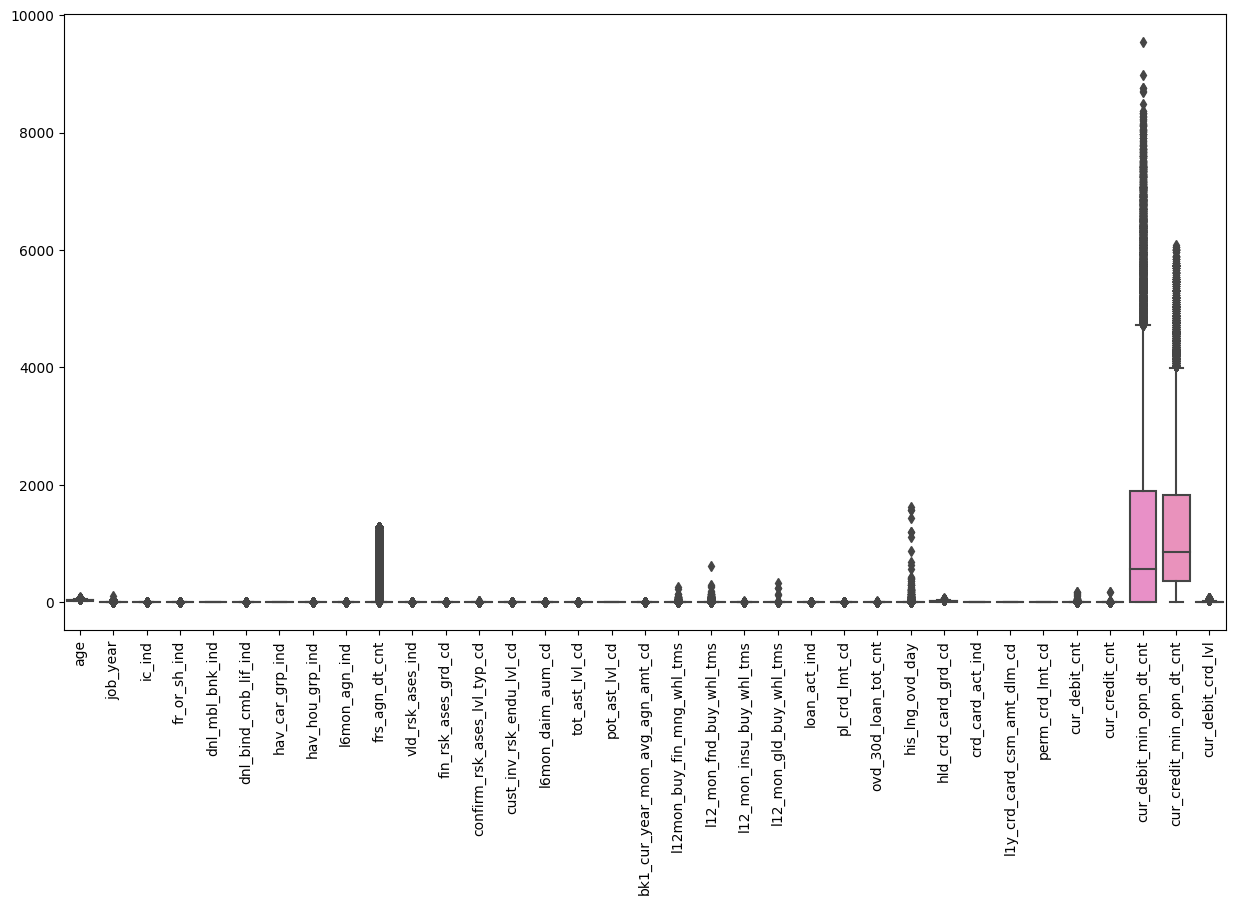

In [73]:
#checking for outliers:
plt.figure(figsize=(15,8))
sns.boxplot(X[num_cols])
plt.xticks(rotation=90)
plt.show()

In [74]:
#as we can see there are few outliers in the dataset, lets cap them:
out_cols = ['age','cur_debit_cnt',	'cur_credit_cnt',	'cur_debit_min_opn_dt_cnt',	'cur_credit_min_opn_dt_cnt',	'cur_debit_crd_lvl']
for i in out_cols:
  Q1 = X[i].quantile(0.25)
  Q3 = X[i].quantile(0.75)
  iqr = Q3 - Q1
  upp_lim = Q3 + 1.5*iqr
  low_lim = Q1 - 1.5*iqr
  X[i] = np.where(X[i]>upp_lim,upp_lim,np.where(X[i]<low_lim,low_lim,X[i]))

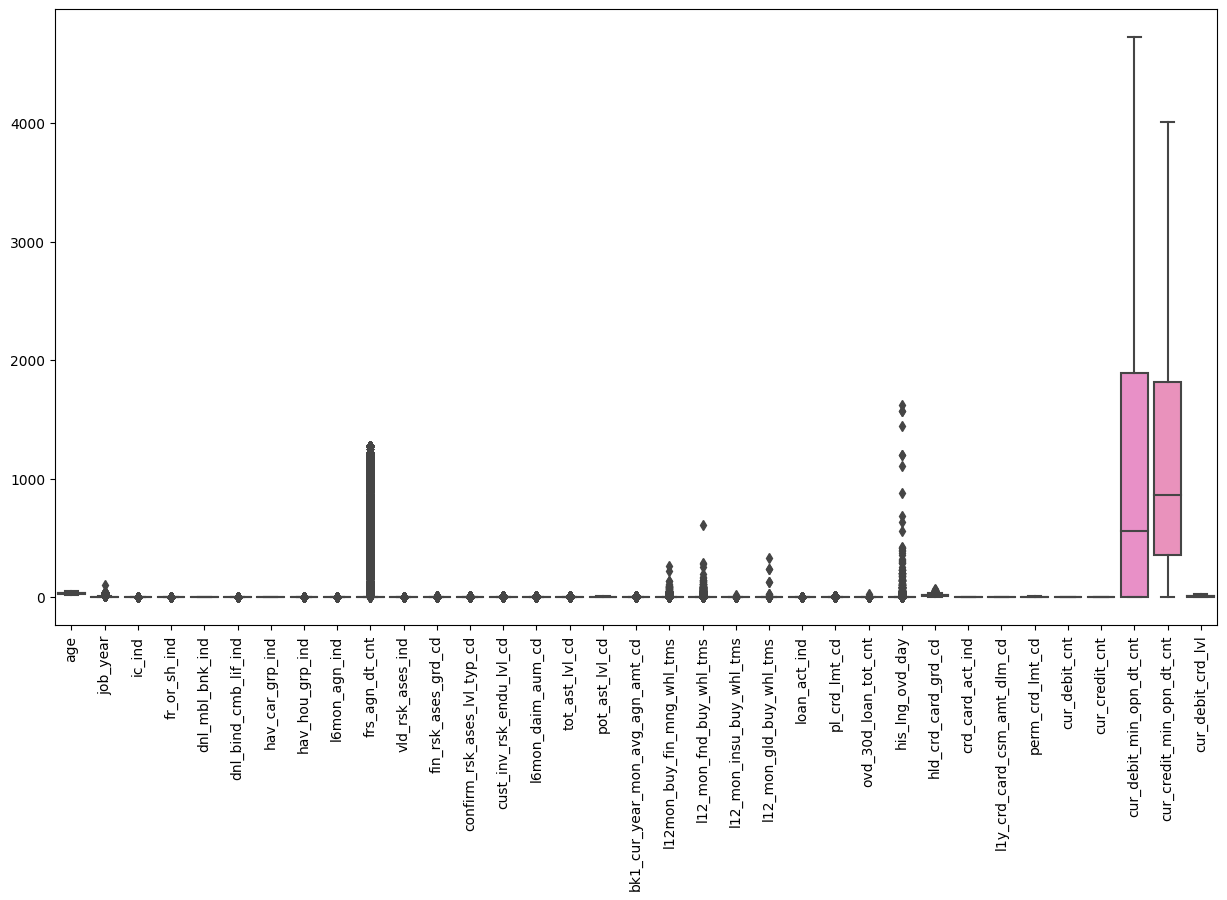

In [75]:
#re-checking for outliers:
plt.figure(figsize=(15,8))
sns.boxplot(X[num_cols])
plt.xticks(rotation=90)
plt.show()

In [76]:
X

,id,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,job_year,ic_ind,fr_or_sh_ind,dnl_mbl_bnk_ind,dnl_bind_cmb_lif_ind,hav_car_grp_ind,hav_hou_grp_ind,l6mon_agn_ind,frs_agn_dt_cnt,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,l12mon_buy_fin_mng_whl_tms,l12_mon_fnd_buy_whl_tms,l12_mon_insu_buy_whl_tms,l12_mon_gld_buy_whl_tms,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
0,U7A4BAD,M,41.0,B,B,Z,3,0,0,0,1,0,0,0,-1,0,-1,4,1,0,-1,6,0,0,0,0,0,0,0,0,0,-1,0,0,3,1.0,0.0,3492.000,-1.0,10.0
1,U557810,M,35.0,A,Z,G,4,0,0,0,0,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,-1,0,0,1,1.0,0.0,4575.000,-1.0,10.0
2,U1E9240,M,53.0,B,A,C,9,0,0,1,1,0,0,1,935,1,3,3,6,7,-1,2,8,6,0,0,0,0,0,0,0,-1,0,0,7,2.0,0.0,4723.375,-1.0,25.0
3,U6DED00,F,41.0,B,M,Z,0,0,0,0,0,0,0,0,-1,0,-1,-1,1,0,-1,6,0,0,0,0,0,0,0,0,0,-1,0,0,1,1.0,0.0,4723.375,-1.0,10.0
4,UDA8E28,F,42.0,B,B,Z,3,1,1,1,0,0,1,0,-1,0,-1,-1,1,5,-1,3,0,0,0,0,0,1,6,0,4,-1,0,0,2,2.5,0.0,2378.000,-1.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39918,U8E66E5,M,24.0,A,L,G,1,0,1,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,1,1,1,0.0,1.0,-1.000,165.0,0.0
39919,U70BACF,M,41.0,B,J,G,1,0,0,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,1,0,1,0.0,2.0,-1.000,166.0,0.0
39920,U777E7D,M,29.0,A,Z,G,0,0,0,0,0,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,0,0,3,0.0,1.0,-1.000,166.0,0.0
39921,UE77AAD,M,31.0,A,Z,A,0,0,0,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,0,0,3,0.0,1.0,-1.000,166.0,0.0


In [77]:
#dropiing the id column:
X.drop(columns='id',inplace=True)

In [78]:
#Encoding the categorical variables:
cat_cols = X.select_dtypes(exclude='number').columns.to_list()
cat_cols

['gdr_cd', 'mrg_situ_cd', 'edu_deg_cd', 'acdm_deg_cd']

In [79]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [80]:
le = LabelEncoder()
for i in cat_cols:
  X[i] = le.fit_transform(X[i])

In [81]:
X

,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,job_year,ic_ind,fr_or_sh_ind,dnl_mbl_bnk_ind,dnl_bind_cmb_lif_ind,hav_car_grp_ind,hav_hou_grp_ind,l6mon_agn_ind,frs_agn_dt_cnt,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,l12mon_buy_fin_mng_whl_tms,l12_mon_fnd_buy_whl_tms,l12_mon_insu_buy_whl_tms,l12_mon_gld_buy_whl_tms,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
0,1,41.0,1,1,6,3,0,0,0,1,0,0,0,-1,0,-1,4,1,0,-1,6,0,0,0,0,0,0,0,0,0,-1,0,0,3,1.0,0.0,3492.000,-1.0,10.0
1,1,35.0,0,11,5,4,0,0,0,0,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,-1,0,0,1,1.0,0.0,4575.000,-1.0,10.0
2,1,53.0,1,0,2,9,0,0,1,1,0,0,1,935,1,3,3,6,7,-1,2,8,6,0,0,0,0,0,0,0,-1,0,0,7,2.0,0.0,4723.375,-1.0,25.0
3,0,41.0,1,9,6,0,0,0,0,0,0,0,0,-1,0,-1,-1,1,0,-1,6,0,0,0,0,0,0,0,0,0,-1,0,0,1,1.0,0.0,4723.375,-1.0,10.0
4,0,42.0,1,1,6,3,1,1,1,0,0,1,0,-1,0,-1,-1,1,5,-1,3,0,0,0,0,0,1,6,0,4,-1,0,0,2,2.5,0.0,2378.000,-1.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39918,1,24.0,0,8,5,1,0,1,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,1,1,1,0.0,1.0,-1.000,165.0,0.0
39919,1,41.0,1,6,5,1,0,0,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,1,0,1,0.0,2.0,-1.000,166.0,0.0
39920,1,29.0,0,11,5,0,0,0,0,0,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,0,0,3,0.0,1.0,-1.000,166.0,0.0
39921,1,31.0,0,11,0,0,0,0,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,0,0,3,0.0,1.0,-1.000,166.0,0.0


In [82]:
# Normalizing the data:
sc = MinMaxScaler()
for i in num_cols:
  X[i] = sc.fit_transform(X[i].values.reshape(-1,1))


In [83]:
X

,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,job_year,ic_ind,fr_or_sh_ind,dnl_mbl_bnk_ind,dnl_bind_cmb_lif_ind,hav_car_grp_ind,hav_hou_grp_ind,l6mon_agn_ind,frs_agn_dt_cnt,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,l12mon_buy_fin_mng_whl_tms,l12_mon_fnd_buy_whl_tms,l12_mon_insu_buy_whl_tms,l12_mon_gld_buy_whl_tms,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
0,1,0.602740,1,1,6,0.030303,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.357143,0.000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.444444,0.4,0.000000,0.739357,0.000000,0.4
1,1,0.438356,0,11,5,0.040404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.222222,0.4,0.000000,0.968594,0.000000,0.4
2,1,0.931507,1,0,2,0.090909,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.731822,1.0,0.333333,0.285714,0.625,0.777778,0.0,0.428571,0.8,0.023077,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.888889,0.8,0.000000,1.000000,0.000000,1.0
3,0,0.602740,1,9,6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.222222,0.4,0.000000,1.000000,0.000000,0.4
4,0,0.630137,1,1,6,0.030303,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.555556,0.0,0.571429,0.0,0.000000,0.0,0.0,0.0,1.0,0.666667,0.0,0.002465,0.000000,0.0,0.0,0.333333,1.0,0.000000,0.503559,0.000000,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39918,1,0.136986,0,8,5,0.010101,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.295775,1.0,0.2,0.222222,0.0,0.285714,0.000000,0.041366,0.0
39919,1,0.602740,1,6,5,0.010101,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.295775,1.0,0.0,0.222222,0.0,0.571429,0.000000,0.041615,0.0
39920,1,0.273973,0,11,5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.295775,0.0,0.0,0.444444,0.0,0.285714,0.000000,0.041615,0.0
39921,1,0.328767,0,11,0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.295775,0.0,0.0,0.444444,0.0,0.285714,0.000000,0.041615,0.0


In [84]:
#re-sampling the data as we have imbalanced target variable:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto')
X_bal,y_bal = smote.fit_resample(X,y)

In [85]:
y_bal.value_counts()

0    30078
1    30078
Name: flag, dtype: int64

In [86]:
#splitting the data in train and test:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_bal,y_bal,test_size=0.2,random_state=42)

<Axes: >

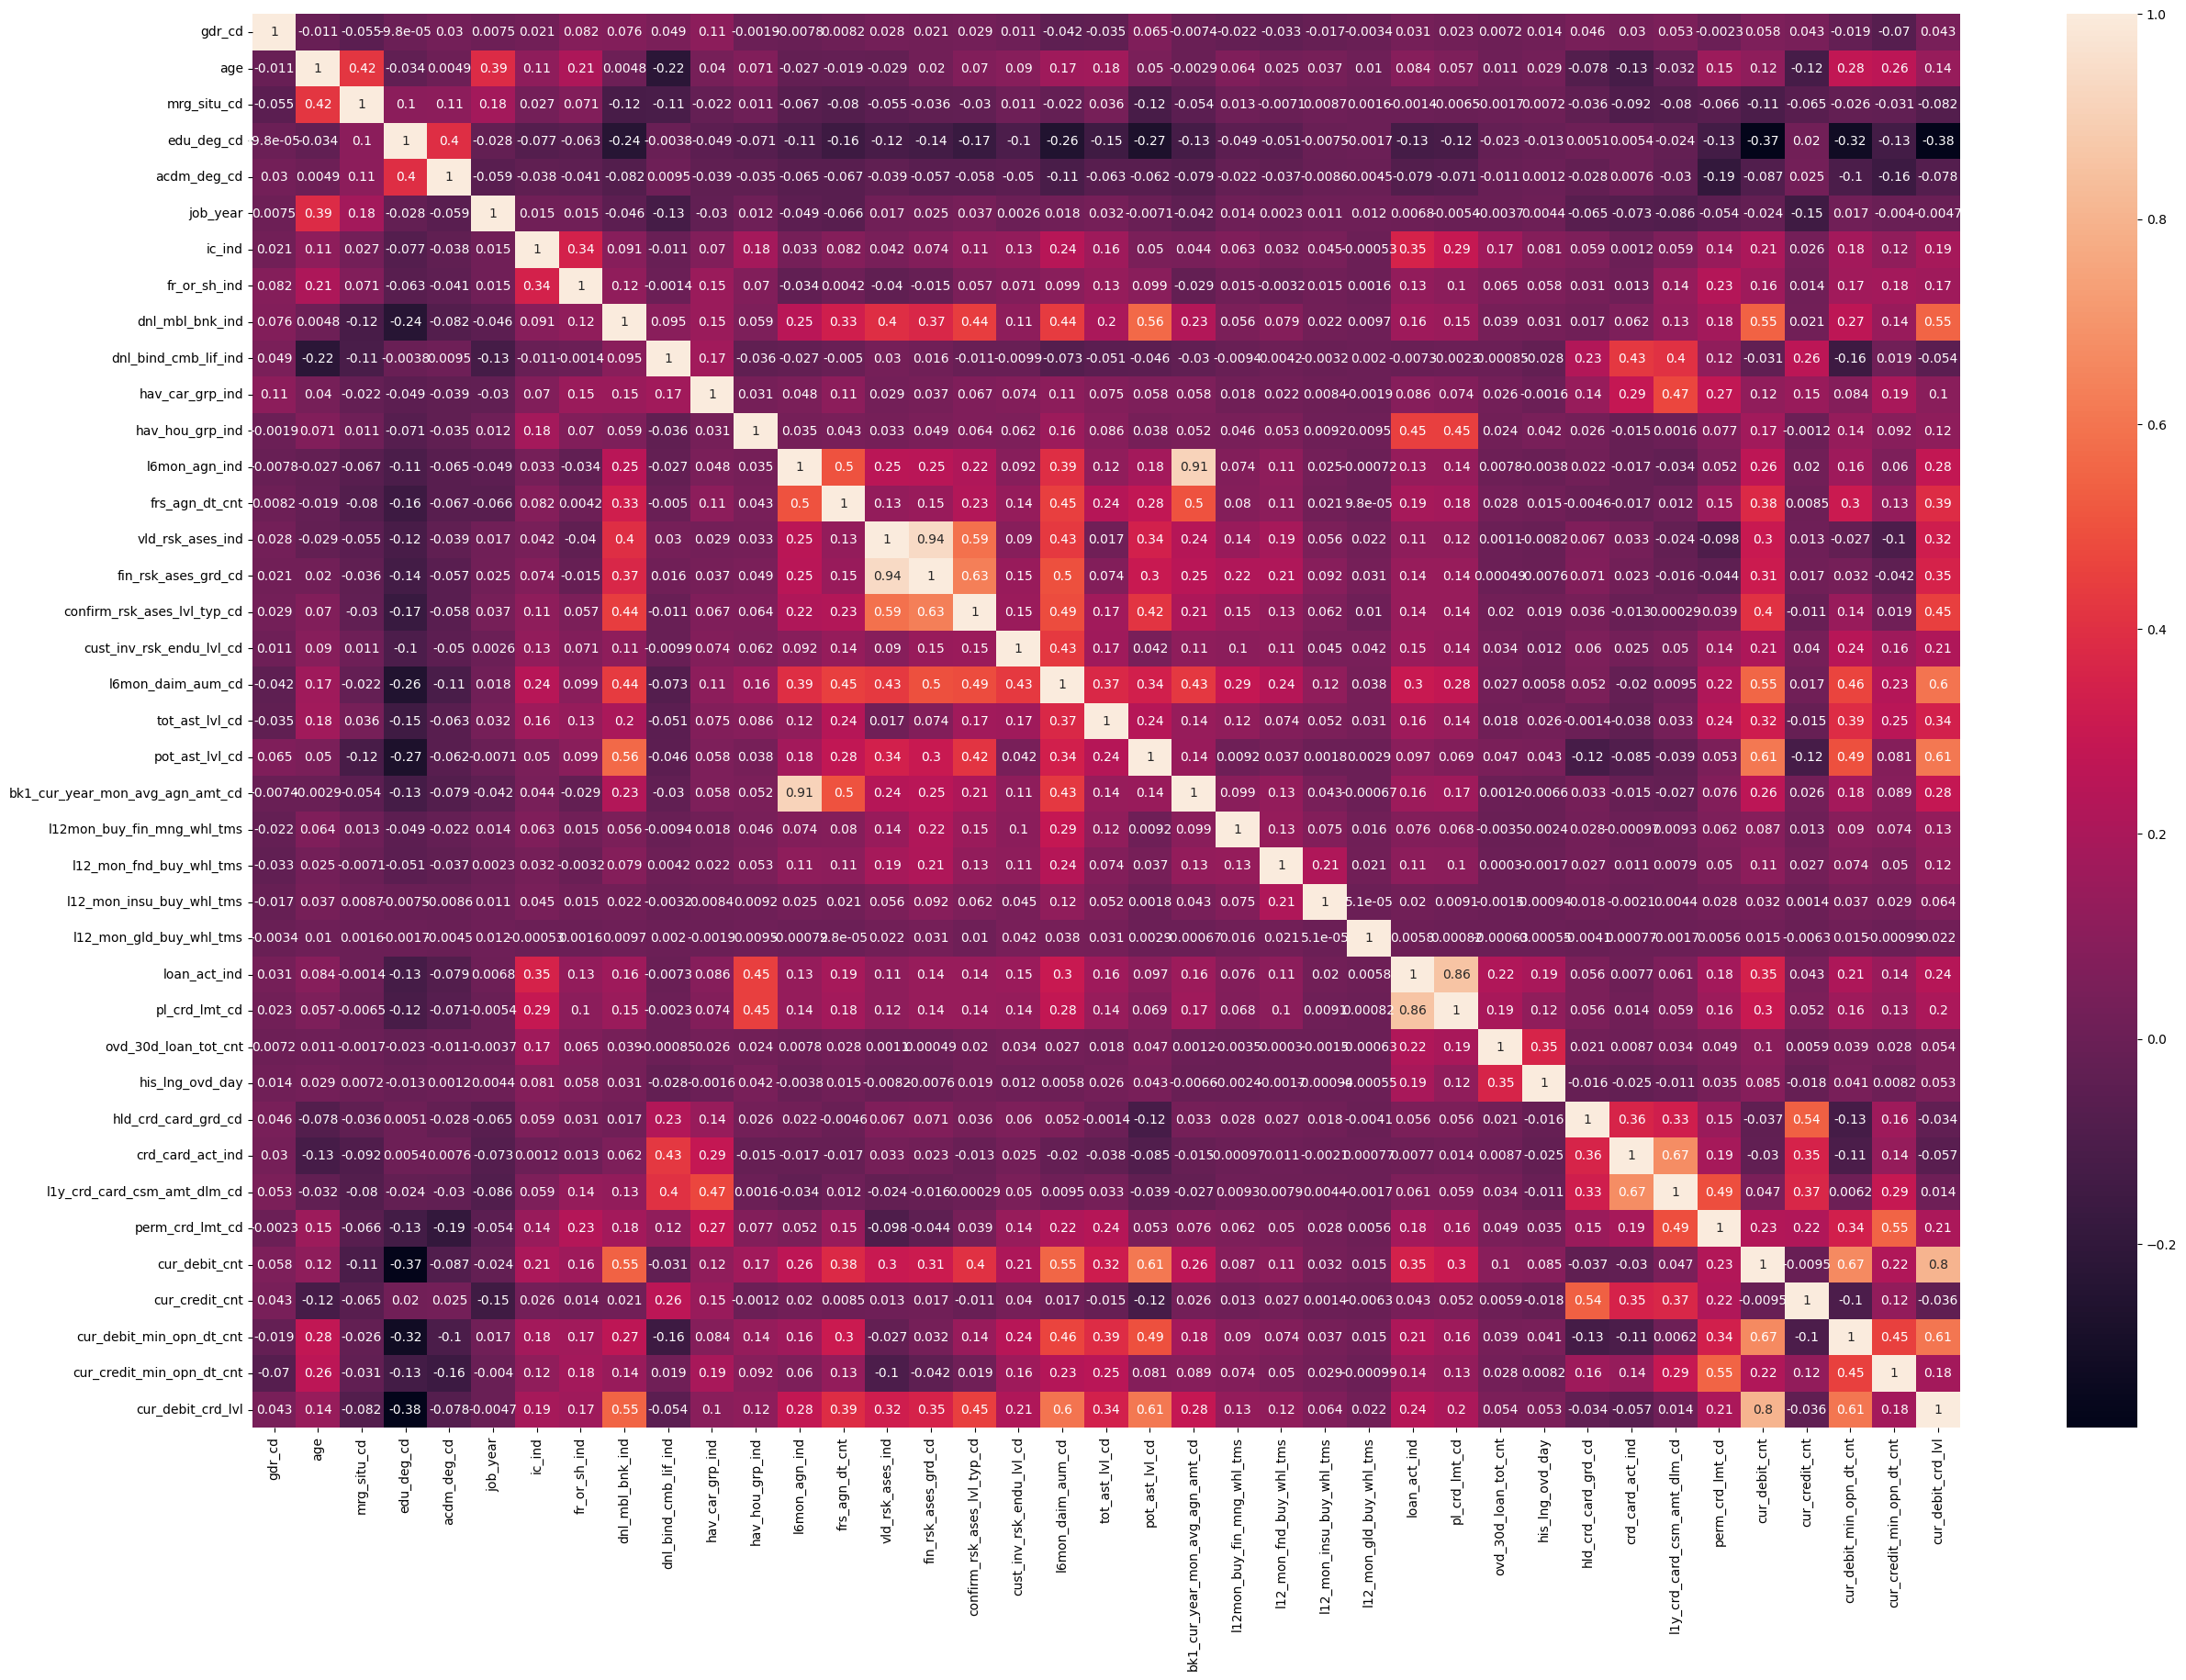

In [87]:
#Lets do the feature selection:
#checking the correlations:
plt.figure(figsize=(30,20))
sns.heatmap(X_train.corr(),annot=True)

In [88]:
# using VIF to select features and remove the multi-collinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['Values'] = [variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]

In [89]:
vif.sort_values(by='Values',ascending=False)

,Features,Values
15,fin_rsk_ases_grd_cd,13.075791
14,vld_rsk_ases_ind,12.932838
33,perm_crd_lmt_cd,11.163403
34,cur_debit_cnt,10.337355
32,l1y_crd_card_csm_amt_dlm_cd,10.163865
30,hld_crd_card_grd_cd,9.813259
38,cur_debit_crd_lvl,9.709073
31,crd_card_act_ind,8.173229
9,dnl_bind_cmb_lif_ind,7.830548
1,age,7.350491


In [90]:
#taking max value as 8 we will filter the best features:
features = vif[vif['Values'] <= 10]['Features'].to_list()
features

['gdr_cd',
 'age',
 'mrg_situ_cd',
 'edu_deg_cd',
 'acdm_deg_cd',
 'job_year',
 'ic_ind',
 'fr_or_sh_ind',
 'dnl_mbl_bnk_ind',
 'dnl_bind_cmb_lif_ind',
 'hav_car_grp_ind',
 'hav_hou_grp_ind',
 'l6mon_agn_ind',
 'frs_agn_dt_cnt',
 'confirm_rsk_ases_lvl_typ_cd',
 'cust_inv_rsk_endu_lvl_cd',
 'l6mon_daim_aum_cd',
 'tot_ast_lvl_cd',
 'pot_ast_lvl_cd',
 'bk1_cur_year_mon_avg_agn_amt_cd',
 'l12mon_buy_fin_mng_whl_tms',
 'l12_mon_fnd_buy_whl_tms',
 'l12_mon_insu_buy_whl_tms',
 'l12_mon_gld_buy_whl_tms',
 'loan_act_ind',
 'pl_crd_lmt_cd',
 'ovd_30d_loan_tot_cnt',
 'his_lng_ovd_day',
 'hld_crd_card_grd_cd',
 'crd_card_act_ind',
 'cur_credit_cnt',
 'cur_debit_min_opn_dt_cnt',
 'cur_credit_min_opn_dt_cnt',
 'cur_debit_crd_lvl']

In [91]:
#selected features:
X_train_trf = X_train[features]
X_test_trf = X_test[features]


In [92]:
#importing Random Forest and evaluation metrics:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [93]:
# Creating the model with selected features:
rf = RandomForestClassifier()
rf.fit(X_train_trf,y_train)
y_pred = rf.predict(X_test_trf)

Acc: 0.8527260638297872


<Axes: >

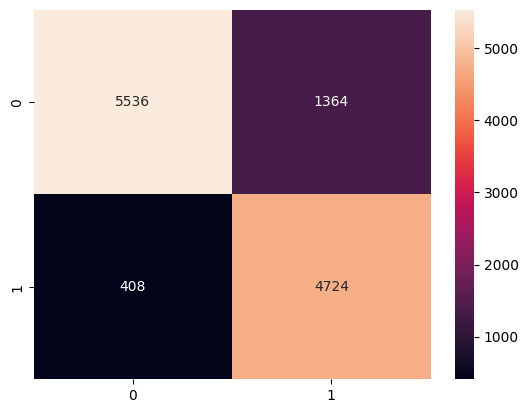

In [94]:
#calculating accuracy score and confusion matrix:
print('Acc:',accuracy_score(y_pred,y_test))
cf = confusion_matrix(y_pred,y_test)
sns.heatmap(cf,annot=True,fmt='d')

In [95]:
#using kbest and chi2
from sklearn.feature_selection import SelectKBest, chi2

In [96]:
select_features = SelectKBest(chi2,k=20).fit(X_train,y_train)
features_df = pd.DataFrame()
features_df['Features'] = X_train.columns
features_df['Scores'] = select_features.scores_

In [97]:
features_df.sort_values(by='Scores',ascending=False)

,Features,Scores
4,acdm_deg_cd,412.372159
12,l6mon_agn_ind,320.021958
0,gdr_cd,195.081752
32,l1y_crd_card_csm_amt_dlm_cd,187.560539
21,bk1_cur_year_mon_avg_agn_amt_cd,185.848796
18,l6mon_daim_aum_cd,180.430891
7,fr_or_sh_ind,171.829493
26,loan_act_ind,170.394452
3,edu_deg_cd,159.160064
10,hav_car_grp_ind,142.004017


In [98]:
features = features_df['Features'].to_list()

In [99]:
#selected features:
X_train_trf = select_features.transform(X_train)
X_test_trf = select_features.transform(X_test)

In [100]:
# Creating the model with selected features:
rf = RandomForestClassifier()
rf.fit(X_train_trf,y_train)
y_pred = rf.predict(X_test_trf)

Acc: 0.8120844414893617


<Axes: >

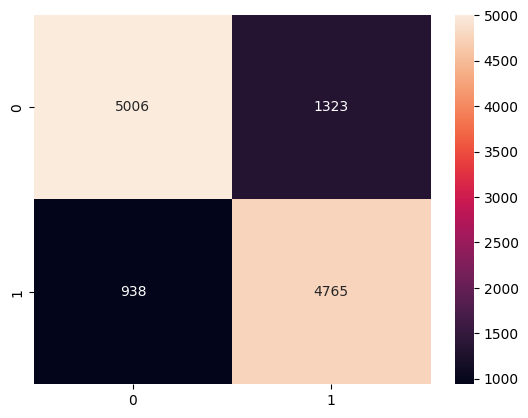

In [101]:
#calculating accuracy score and confusion matrix:
print('Acc:',accuracy_score(y_pred,y_test))
cf = confusion_matrix(y_pred,y_test)
sns.heatmap(cf,annot=True,fmt='d')

In [102]:
#using RFECV
from sklearn.feature_selection import RFECV

In [103]:
rfecv = RFECV(estimator = RandomForestClassifier(),
              step=1,
              cv=5, scoring='accuracy')

In [104]:
rfecv = rfecv.fit(X_train,y_train)

In [105]:
y_pred = rfecv.predict(X_test)

In [106]:
#calculating accuracy score and confusion matrix:
print('Acc:',accuracy_score(y_pred,y_test))
cf = confusion_matrix(y_pred,y_test)
sns.heatmap(cf,annot=True,fmt='d')

In [107]:
#using random forest feature importance:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

Acc: 0.8622839095744681


<Axes: >

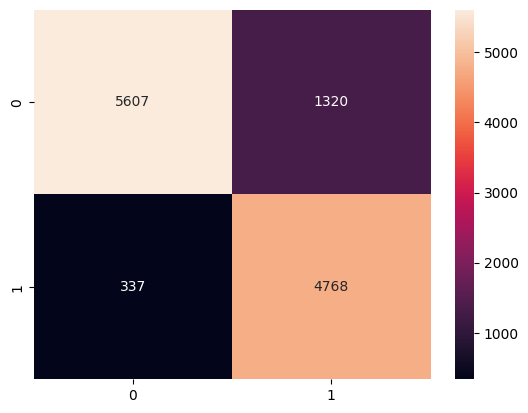

In [108]:
#calculating accuracy score and confusion matrix:
print('Acc:',accuracy_score(y_pred,y_test))
cf = confusion_matrix(y_pred,y_test)
sns.heatmap(cf,annot=True,fmt='d')

In [109]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      6927
           1       0.78      0.93      0.85      5105

    accuracy                           0.86     12032
   macro avg       0.86      0.87      0.86     12032
weighted avg       0.88      0.86      0.86     12032



In [112]:
score = rf.predict_proba(X_test)[:,1]

In [113]:
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [114]:
score

array([0.29, 0.92, 0.87, ..., 0.86, 0.45, 0.1 ])

In [115]:
from sklearn.metrics import roc_curve,auc

In [116]:
fpr,tpr,thresholds = roc_curve(y_test,score)

In [117]:
roc_auc = auc(fpr,tpr)

In [118]:
roc_auc

0.9222697956883608

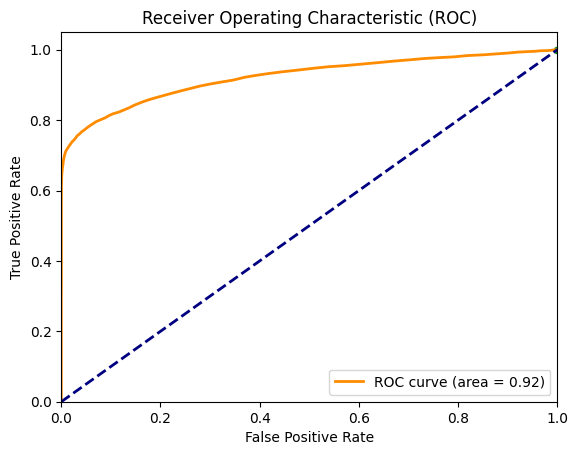

In [130]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [125]:
thresholds

array([2.  , 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91,
       0.9 , 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 ,
       0.79, 0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69,
       0.68, 0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58,
       0.57, 0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47,
       0.46, 0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36,
       0.35, 0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25,
       0.24, 0.23, 0.22, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01, 0.  ])

In [133]:
threshold_df = pd.DataFrame({'Threshold':thresholds,'tpr':tpr,'fpr':fpr})

In [134]:
threshold_df

,Threshold,tpr,fpr
0,2.00,0.000000,0.000000
1,1.00,0.067017,0.000000
2,0.99,0.129599,0.000000
3,0.98,0.180355,0.000000
4,0.97,0.225854,0.000000
...,...,...,...
96,0.04,0.999179,0.991925
97,0.03,0.999671,0.994953
98,0.02,1.000000,0.997813
99,0.01,1.000000,0.998822


In [136]:
threshold_df[threshold_df['fpr'] == threshold_df['fpr'].min()]

,Threshold,tpr,fpr
0,2.00,0.000000,0.0
1,1.00,0.067017,0.0
2,0.99,0.129599,0.0
3,0.98,0.180355,0.0
4,0.97,0.225854,0.0
5,0.96,0.264290,0.0
6,0.95,0.301413,0.0


In [142]:
threshold_df[(threshold_df['tpr'] >= 0.8) & (threshold_df['tpr'] < 0.9)].sort_values(by='fpr')

,Threshold,tpr,fpr
53,0.48,0.802234,0.081258
54,0.47,0.806505,0.088324
55,0.46,0.812254,0.095390
56,0.45,0.818167,0.104475
57,0.44,0.822602,0.115579
58,0.43,0.828679,0.126009
59,0.42,0.835250,0.137113
60,0.41,0.842313,0.147039
61,0.40,0.850854,0.162180
62,0.39,0.857424,0.175471


- Here the best threshold value for higher TPR(Sensitivity/Recall) and lower FPR will be selected. Hence, a threshold value between 0.4 to 0.48 can be chosen.